  Name of area:      Amstelhaege
  Total houses:      20
  Eensgezinswoning:  12.0
  Bungalow:          5.0
  Maison:            3.0

  Building:  Eens gezins woming
  Length:    8.0   Width:  8.0
  Extra:     2.0   Bonus:  3.0

  Building:  Bungalow
  Length:    7.5   Width:  10
  Extra:     3.0   Bonus:  4.0

  Building:  Maison
  Length:    10.5   Width:  11.0
  Extra:     6.0   Bonus:  6.0


  Run:  0 Cuurent top yield:  10687.439999999997
  Run:  1 Cuurent top yield:  10969.161985094388
  Run:  20 Cuurent top yield:  11208.863328705678
  Run:  22 Cuurent top yield:  11222.963282483894
  Run:  49 Cuurent top yield:  11278.536202103383
  Run:  52 Cuurent top yield:  11278.569967897936
  Run:  54 Cuurent top yield:  11661.068531720053
  Run:  55 Cuurent top yield:  11682.648163246748
  Run:  61 Cuurent top yield:  11752.702701470442
  Run:  62 Cuurent top yield:  11896.207482628413
  Run:  64 Cuurent top yield:  12683.72384516484
  Run:  315 Cuurent top yield:  12714.274026972425
  R

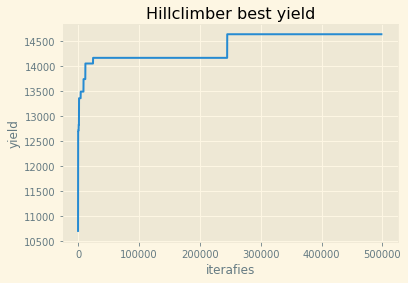

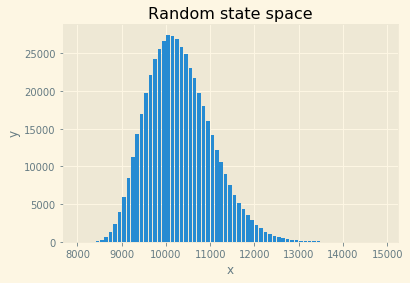

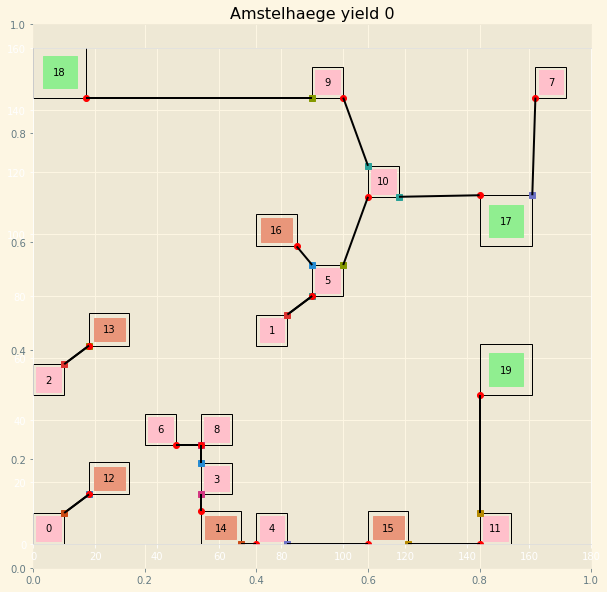

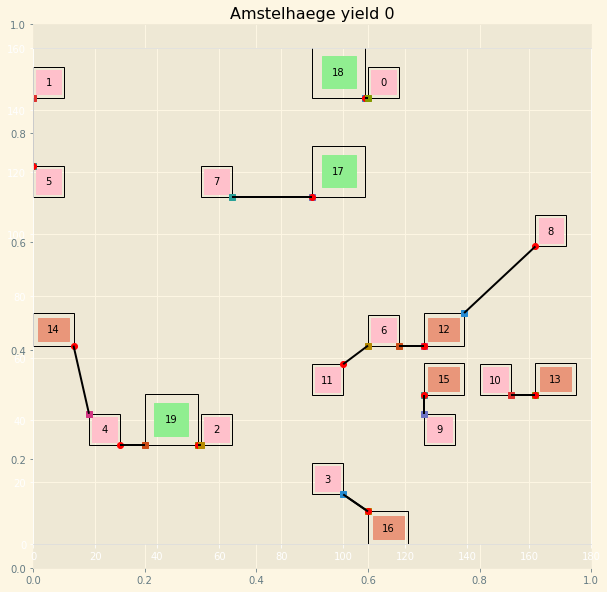

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style
style.use('Solarize_Light2')
from math import sqrt
import random
import copy

# Project source files
import plotah
import calc
import hage

GRID_X = 18
GRID_Y = 16

GRID_X_POINTS = 10
GRID_Y_POINTS = 10

iterations = 500000

ah = hage.amstel("viertel_eins.json")

print( "  Name of area:     ", ah.name)
print( "  Total houses:     ", ah.total)
print( "  Eensgezinswoning: ", ah.total * ah.ewg)
print( "  Bungalow:         ", ah.total * ah.bgl)
print( "  Maison:           ", ah.total * ah.msn)
print("")

# Create composition of houses
ewg_number = int(ah.total * ah.ewg)
bgl_number = int(ah.total * ah.bgl)
msn_number = int(ah.total * ah.msn)

# Get specifications for eash building
for building in ah.buildings:
    print("  Building: ", building.name) 
    print("  Length:   ", building.length, "  Width: ", building.width)
    print("  Extra:    ", building.extra,  "  Bonus: ", building.bonus)
    print("")
    
buildings = {}
n = 0
for i in range(0, int(ewg_number)):
    buildings[i] = {'type' : 'egw', 'value' : 285, 'n' : n, 'x' : 0, 'y' : 0, 'extra' : 2.0, 'length' : 8.0 , 'width' : 8.0, 'bonus' : 0.03} 
    n += 1

spot = i+1
n = 0
for i in range(spot, spot + int(bgl_number)):
    buildings[i] = {'type' : 'bgl', 'value' : 399,'n' : n,'x' : 0, 'y' : 0, 'extra' : 3.0, 'length' : 7.5 , 'width' : 10.0, 'bonus' : 0.04}  
    n += 1

n = 0
spot = i+1    
for i in range(spot, spot + int(msn_number)):
    buildings[i] = {'type' : 'msn', 'value' : 610, 'n' : n,'x' : 0, 'y' : 0, 'extra' : 6.0, 'length' : 10.5 ,'width' : 11.0, 'bonus' : 0.06} 
    n += 1
    
print("")

scores = []
best_yield = []
top_yield = 0
top_buildings = {}
top_free_distance = {}

# Generate random grid posistion
grid = []
prev_grid = grid
for y in range(0, GRID_Y_POINTS):
    for x in range (0, GRID_X_POINTS):
         grid.append([x,y])
random.shuffle(grid)  

grid_list = []
for spot in range(0, GRID_X_POINTS * GRID_Y_POINTS):
     grid_list.append(spot)

spot_list = []
for spot in range(0, ah.total):
     spot_list.append(spot)   
        
# Assign each building a grid posisttion  
for spot in range(0, ah.total):  
    buildings[spot]['x']  = grid[spot][0] * GRID_X
    buildings[spot]['y']  = grid[spot][1] * GRID_Y

# Hill climber eploration
for run in range(0, iterations):
    
    ah_total_yield = 0   
    # Save current grid if swap is not succesful
    prev_grid = grid
    # Swap two building with free grid poits
    calc.random_swap(buildings, grid, grid_list, spot_list)
    calc.random_swap(buildings, grid, grid_list, spot_list)
    
    # Calculate distances between all buildings
    dist_table = calc.calc_distance_table( ah, grid )
    # Find neighbours
    min_distance = calc.calc_min_distance( ah, dist_table) 
    # Calculate extra free distance
    free_distance = calc.calc_s2n( ah, buildings, min_distance)
    # Calculate value of Amstelhaege
    score_total = calc.calc_score(ah, buildings, free_distance ) 
    
    # Calculate yield for this map
    for spot in range(0, ah.total):
        ah_total_yield += score_total[spot]['pyp']
    
    # Keep the best result sofar
    if ah_total_yield > top_yield:
        # Result improved, keep this grid
        top_yield = ah_total_yield
        top_buildings = copy.deepcopy(buildings)
        top_free_distance = free_distance.copy()
        print("  Run: ", run,  "Cuurent top yield: ", top_yield)
    else: 
        # Accept as solution or not
        
        # Result not improved, restore previous grid
        grid = prev_grid
        #print("  Run: ", run,  "No improvement: ", ah_total_yield)
    # Archive the results
    scores.append(ah_total_yield)
    best_yield.append(top_yield)
    
# Plot the histogram of all scores   
plotah.plot_scores(best_yield, "Hillclimber best yield")    
# Plot the histogram of all scores   
plotah.plot_histogram(scores)
# Plot the layout of Amstelheage
plotah.ah_plot( ah, top_buildings, top_free_distance)
# Plot the layout of Amstelheage
plotah.ah_plot( ah, buildings, free_distance )

